In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [90]:
data = pd.read_csv('data_encoded/encoded_heart_attack_risk_dataset.csv')
data.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic Pressure,Diastolic Pressure,Sex_Male,Diet_Healthy,Diet_Unhealthy
0,67,208,72,0,0,1,0,0,4.168189,0,...,31.251233,286,0,6,0,158,88,1,0,0
1,21,389,98,1,1,1,1,1,1.813242,1,...,27.194973,235,1,7,0,165,93,1,0,1
2,21,324,72,1,0,0,0,0,2.078353,1,...,28.176571,587,4,4,0,174,99,0,1,0
3,84,383,73,1,1,1,0,1,9.828130,1,...,36.464704,378,3,4,0,163,100,1,0,0
4,66,318,93,1,1,1,1,0,5.804299,1,...,21.809144,231,1,5,0,91,88,1,0,1


### Shuffle the data

In [91]:
data = data.sample(frac=1, random_state=42).reset_index(drop=True)
data.head(5)

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic Pressure,Diastolic Pressure,Sex_Male,Diet_Healthy,Diet_Unhealthy
0,65,340,75,0,0,1,1,1,9.870784,1,...,35.561283,315,0,4,0,124,68,1,1,0
1,77,361,46,1,0,1,0,0,2.763339,0,...,26.638707,471,3,6,1,177,104,1,1,0
2,70,341,73,1,1,1,1,1,16.325463,1,...,23.927789,104,1,8,1,156,84,1,1,0
3,47,392,72,0,1,1,1,0,5.161941,0,...,29.480917,201,6,9,1,155,75,1,0,0
4,63,173,98,0,0,1,0,1,3.681472,0,...,21.110044,638,2,7,0,103,109,1,0,1


### Scale the numerical features

In [92]:
# Separate target feature
X = data.drop('Heart Attack Risk', axis=1)
y = data['Heart Attack Risk']

# Identify the numerical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
X_numerical = X[numerical_features]

# Scale numerical features
scaler = StandardScaler()
X_scaled_numerical = scaler.fit_transform(X_numerical)

# Replace numerical columns in X with their scaled version
X_scaled = X.copy()
X_scaled[numerical_features] = X_scaled_numerical

In [93]:
X_scaled.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Systolic Pressure,Diastolic Pressure,Sex_Male,Diet_Healthy,Diet_Unhealthy
0,0.531432,0.990899,-0.001055,-1.369651,-0.986061,0.339157,0.997151,0.819762,-0.024812,1.008365,...,-0.122997,1.055551,-0.458922,-1.528843,-1.520604,-0.420353,-1.169013,0.658765,1.400169,-0.701667
1,1.096183,1.250612,-1.412263,0.730113,-0.986061,0.339157,-1.002857,-1.219867,-1.253748,-0.991704,...,1.145629,-0.356512,0.238330,-0.214528,-0.514750,1.591149,1.284017,0.658765,1.400169,-0.701667
2,0.766745,1.003267,-0.098380,0.730113,1.014136,0.339157,0.997151,0.819762,1.091255,1.008365,...,0.911118,-0.785535,-1.402000,-1.090738,0.491104,0.794139,-0.078777,0.658765,1.400169,-0.701667
3,-0.315695,1.633997,-0.147042,-1.369651,1.014136,0.339157,0.997151,-1.219867,-0.839010,-0.991704,...,0.704371,0.093288,-0.968452,1.099787,0.994032,0.756186,-0.692035,0.658765,-0.714200,-0.701667
4,0.437307,-1.074433,1.118179,-1.369651,-0.986061,0.339157,-1.002857,0.819762,-1.094995,-0.991704,...,0.821625,-1.231464,0.984748,-0.652633,-0.011823,-1.217363,1.624716,0.658765,-0.714200,1.425178


### Split the Data

In [94]:
X = X_scaled
y = data['Heart Attack Risk']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [95]:
print(f"Train size: {len(X_train)}")
print(f"Test size: {len(X_test)}")

Train size: 7010
Test size: 1753


### Hyperparameter tuning using GridSearchCV

In [180]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf'],
    'class_weight': ['balanced']
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best F1 Score:", grid.best_score_)

Best Parameters: {'C': 1, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf'}
Best F1 Score: 0.4040857104578201


### Train the SVM Model

In [181]:
svm_model = SVC(kernel='rbf', C=1, gamma=0.01, class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

SVC(C=1, class_weight='balanced', gamma=0.01, random_state=42)

In [182]:
# Make Predictions
y_pred = svm_model.predict(X_test)

### Evaluate the Model

In [183]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5162578436965203


In [184]:
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))

Confusion Matrix: [[626 499]
 [349 279]]


In [185]:
print("Classification Report:", classification_report(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.64      0.56      0.60      1125
           1       0.36      0.44      0.40       628

    accuracy                           0.52      1753
   macro avg       0.50      0.50      0.50      1753
weighted avg       0.54      0.52      0.52      1753



### Confusion Matrix and Model Metrics Plot

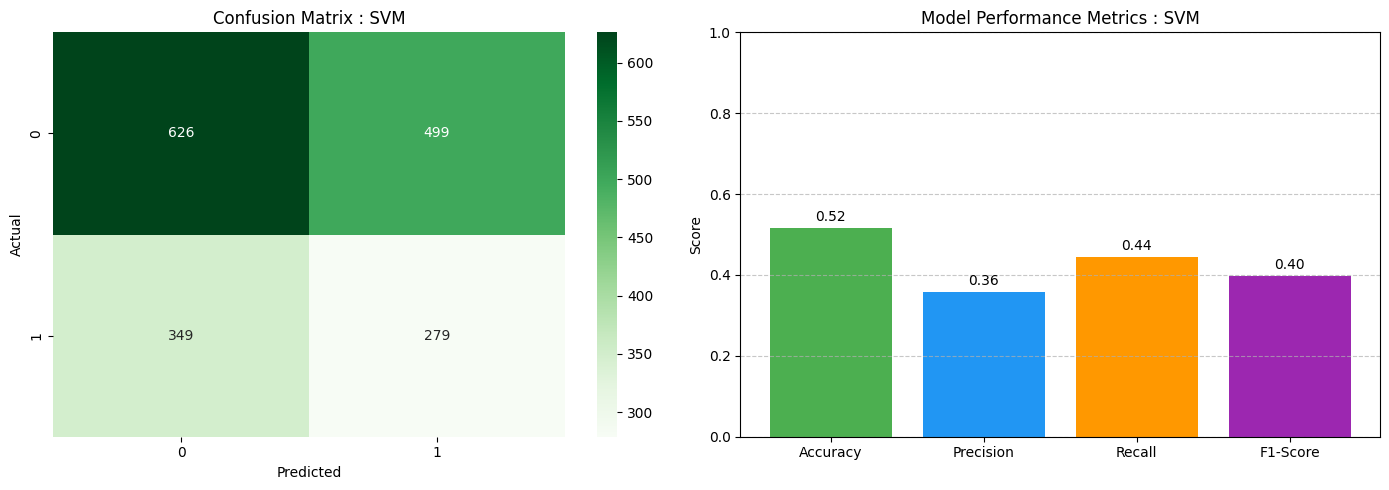

In [186]:
cm = confusion_matrix(y_test, y_pred)

report = classification_report(y_test, y_pred, output_dict=True)
precision = report['1']['precision']
recall = report['1']['recall']
f1 = report['1']['f1-score']
accuracy = accuracy_score(y_test, y_pred)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=[0, 1], yticklabels=[0, 1], ax=axes[0])
axes[0].set_title("Confusion Matrix : SVM")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

bars = axes[1].bar(metrics, values, color=['#4caf50', '#2196f3', '#ff9800', '#9c27b0'])

for bar in bars:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom')

axes[1].set_ylim(0, 1)
axes[1].set_title('Model Performance Metrics : SVM')
axes[1].set_ylabel('Score')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()